In [1]:
import pandas as pd

In [2]:
import json
import requests

full_data = requests.get("https://subway.toddwschneider.com/turnstiles_summary.json").json()

In [3]:
from datetime import datetime, timedelta
import numpy as np

secs = full_data["daily"]["date"]
secs = np.array(secs)
dates = [datetime.fromtimestamp(s / 1000) for s in secs]
dates = [d + timedelta(1) for d in dates]
rides = full_data["daily"]["net_entries"]

In [4]:
df = pd.DataFrame({"dates": dates, "rides": rides})

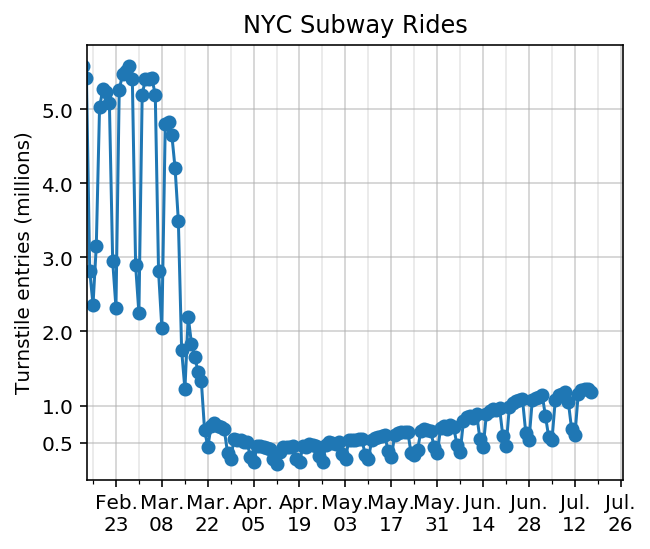

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

w = 4
fig, ax = plt.subplots(figsize=(1.2 * w, w))
ax.plot(df.dates, df.rides / 1e6, "o-")
ax.set_xlim(datetime(2020, 2, 15), None)
ax.set_ylim(0, None)
ax.set_ylabel("Turnstile entries (millions)")
ax.grid(alpha=0.6)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b.\n%d"))

weeks = pd.date_range(start=min(dates), end=max(dates) + timedelta(days=30 * 6), freq="2W")
weeks_mpl = [mdates.date2num(w) for w in weeks]
ax.xaxis.set_major_locator(plt.FixedLocator(weeks_mpl))

weeks = pd.date_range(start=min(dates) + timedelta(7), end=max(dates) + timedelta(days=30 * 6), freq="2W")
weeks_mpl = [mdates.date2num(w) for w in weeks]
ax.xaxis.set_minor_locator(plt.FixedLocator(weeks_mpl))
ax.grid(which="minor", axis="x", alpha=0.3)

ax.yaxis.set_major_locator(plt.FixedLocator([0.5, 1, 2, 3, 4, 5]))
ax.set_title("NYC Subway Rides")
fig.savefig("imgs/nyc-subway-rides.svg", bbox_inches="tight")
fig.savefig("imgs/nyc-subway-rides.png", bbox_inches="tight", dpi=300)

In [6]:
df.to_csv("data/nyc-taxi-rides.csv", index=False)